In [53]:
%matplotlib notebook
import matplotlib as mpl
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
import math
import controls as ctrl
import pandas as pd
import os

# Defining our endowments

In [5]:
original_task_endowments = ctrl.task_endowments
unique_task_endowments = list(set(ctrl.task_endowments))
unique_task_endowments.sort()
unique_task_endowments

[9, 15, 25, 40, 80, 125]

# Defining our tax rates

In [6]:
tax_rates = []
for i in range(0,11, 1):
    tax_rates.append(i/10)
tax_rates

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# Calculating Public Incomes and Private Productivities

## Calculating Public Contributions

In [7]:
total_public_contributions = []

for tax_rate in tax_rates:
    current_public_contribution = 0 # public contrib for current tax rate
    
    for endowment in original_task_endowments:
        current_public_contribution += tax_rate*endowment # calculating public contrib for current tax rate
        
    total_public_contributions.append(current_public_contribution) # storing current public contrib
    
total_public_contributions

[0.0, 34.9, 69.8, 104.7, 139.6, 174.5, 209.4, 244.3, 279.2, 314.1, 349.0]

## Processing Public Incomes and Private Productivities

In [8]:
public_incomes = []
private_productivities = []

for total_public_contribution in total_public_contributions:
    
    if total_public_contribution <= 192:
        # public income for current total contribution
        public_incomes.append(101 / (1 + 100 * math.exp(-0.025 * total_public_contribution)) - 1)
        # private productivity for current total contribution
        private_productivities.append(ctrl.alpha + ctrl.beta*total_public_contribution)
    else:
        public_incomes.append(101 / (1 + 100 * math.exp(-0.025 * 192)) - 1)
        private_productivities.append(ctrl.alpha + ctrl.beta*192)

In [9]:
public_incomes

[0.0,
 1.3603343512267108,
 4.469956188096408,
 11.17085992784171,
 23.937734568535316,
 43.40247149717663,
 54.40395032822436,
 54.40395032822436,
 54.40395032822436,
 54.40395032822436,
 54.40395032822436]

In [10]:
private_productivities

[5.0,
 7.18125,
 9.3625,
 11.54375,
 13.725,
 15.90625,
 17.0,
 17.0,
 17.0,
 17.0,
 17.0]

# Calculating Private Incomes

In [11]:
private_incomes = {}

for task_endowment in unique_task_endowments:
    index = 0 # index for calling the private productivity that corresponds to an specific tax rate
    
    private_incomes[f"private_incomes_{task_endowment}"] = [] # list with all the private incomes for a player
    
    for tax_rate in tax_rates: # calculating all the private incomes for an specific player
        private_incomes[f"private_incomes_{task_endowment}"].append(round(task_endowment*(1-tax_rate)*private_productivities[index], 3))
        index += 1

In [12]:
private_incomes

{'private_incomes_9': [45.0,
  58.168,
  67.41,
  72.726,
  74.115,
  71.578,
  61.2,
  45.9,
  30.6,
  15.3,
  0.0],
 'private_incomes_15': [75.0,
  96.947,
  112.35,
  121.209,
  123.525,
  119.297,
  102.0,
  76.5,
  51.0,
  25.5,
  0.0],
 'private_incomes_25': [125.0,
  161.578,
  187.25,
  202.016,
  205.875,
  198.828,
  170.0,
  127.5,
  85.0,
  42.5,
  0.0],
 'private_incomes_40': [200.0,
  258.525,
  299.6,
  323.225,
  329.4,
  318.125,
  272.0,
  204.0,
  136.0,
  68.0,
  0.0],
 'private_incomes_80': [400.0,
  517.05,
  599.2,
  646.45,
  658.8,
  636.25,
  544.0,
  408.0,
  272.0,
  136.0,
  0.0],
 'private_incomes_125': [625.0,
  807.891,
  936.25,
  1010.078,
  1029.375,
  994.141,
  850.0,
  637.5,
  425.0,
  212.5,
  0.0]}

# Obtaining Final Payoffs

In [13]:
final_payoffs = {}

for task_endowment in unique_task_endowments:
    index = 0 # index for calling the private income/public contrib that corresponds to an specific tax rate
    
    final_payoffs[f"final_payoff_{task_endowment}"] = [] # list with all the final_payoffs for a player
    
    for tax_rate in tax_rates: # calculating all the final payoffs for an specific player
        final_payoffs[f"final_payoff_{task_endowment}"].append(round(private_incomes[f"private_incomes_{task_endowment}"][index] 
                                                              +public_incomes[index], 3))
        index += 1

In [14]:
final_payoffs

{'final_payoff_9': [45.0,
  59.528,
  71.88,
  83.897,
  98.053,
  114.98,
  115.604,
  100.304,
  85.004,
  69.704,
  54.404],
 'final_payoff_15': [75.0,
  98.307,
  116.82,
  132.38,
  147.463,
  162.699,
  156.404,
  130.904,
  105.404,
  79.904,
  54.404],
 'final_payoff_25': [125.0,
  162.938,
  191.72,
  213.187,
  229.813,
  242.23,
  224.404,
  181.904,
  139.404,
  96.904,
  54.404],
 'final_payoff_40': [200.0,
  259.885,
  304.07,
  334.396,
  353.338,
  361.527,
  326.404,
  258.404,
  190.404,
  122.404,
  54.404],
 'final_payoff_80': [400.0,
  518.41,
  603.67,
  657.621,
  682.738,
  679.652,
  598.404,
  462.404,
  326.404,
  190.404,
  54.404],
 'final_payoff_125': [625.0,
  809.251,
  940.72,
  1021.249,
  1053.313,
  1037.543,
  904.404,
  691.904,
  479.404,
  266.904,
  54.404]}

# Creating our payoff table

In [15]:
payoffs_db = pd.DataFrame.from_dict(final_payoffs, orient='index')
payoffs_db.to_excel("payoffs_table.xlsx")

D:\Anaconda5.2.0\lib\site-packages\pandas\compat\_optional.py:106: UserWarning: Pandas requires version '0.9.8' or newer of 'xlsxwriter' (version '0.9.3' currently installed).
  warnings.warn(msg, UserWarning)


# Creating our subplots

<IPython.core.display.Javascript object>


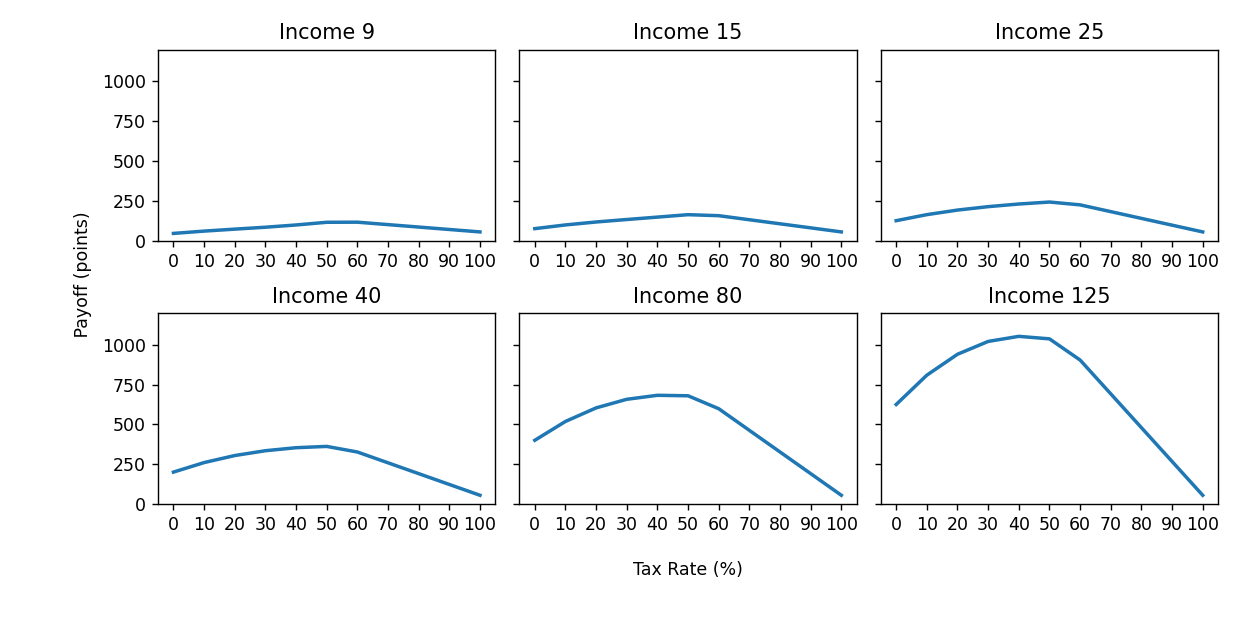

In [62]:
from matplotlib.figure import Figure

# creating a set of subplots
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, sharex=False, sharey=True, figsize=(10, 5))

# add a big axes, hide frame
fig.add_subplot(111, frameon=False)

axs = [ax1,ax2,ax3,ax4,ax5,ax6] # storing a subplot for each progressivity level

# plotting all subplots
for n_axis in range(1, len(axs) + 1):
    task_endowment = unique_task_endowments[n_axis-1]
    xvals = [tax_rate*100 for tax_rate in tax_rates] # calling our tax rates for a progressivity level
    
    axs[n_axis-1].plot(xvals, final_payoffs[f"final_payoff_{task_endowment}"], linewidth = 2)
    
    axs[n_axis-1].set_ylim(0, 1200) # setting the y axis limit from 0% to 100%
    axs[n_axis-1].set_title(f"Income {task_endowment}") # setting the title of each subplot as to their respective level   
    
# hiding big subplot tick and tick label of the big axes
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
plt.tight_layout(pad=1.0)

# stablishing the x and y titles
plt.xlabel("Tax Rate (%)")
plt.tick_params(axis='x', which='major', pad=15) # spacing between x-axis ticks and name
plt.ylabel(" Payoff (points)")
plt.tick_params(axis='y', which='major', pad=15) # spacing between y-axis ticks and name
#plt.title("Possible Incomes without messaging")

# # setting up the progressivity plots
plt.setp(axs, xticks=[tax_rate*100 for tax_rate in tax_rates], xticklabels=[round(tax_rate*100) for tax_rate in tax_rates]) 

fig.tight_layout(pad=1.0) # adding some spacing between subplots
fig.savefig('..\_static\MoneyPolitics\Income plots.png')